# Numerics 1: Homework 05

## Cooper Simpson

## Setup

We note that throughout we will use lower case bold letters ($\mathbf{b}$) to indicate column vectors and upper case bold letters ($\mathbf{A}$) to indicate matrices.

Below we define the code used in solving the problems.

In [ ]:
#Theme
from jupyterthemes import jtplot
!jt -t grade3
jtplot.style()

In [ ]:
!jt -r;

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set()

In [3]:
#Functions
norm = np.linalg.norm

def gauss_seidel(A):
    pass

def eigenPower(A, x_0, tolerance=0.001, iterations=100):
    x = x_0/norm(x_0, ord=2)
    i = 0
    
    while i<iterations:
        y = np.dot(A, x)
        mu = np.dot(x, y)
        
        temp = y/norm(y, ord=2)
        er = norm(x-temp, ord=2)
        
        x = temp
        i+=1
        
        if er < tolerance:
            break
        
    return mu, x

def rayleigh(A, x_0, iterations=10):
    x_1 = np.dot(A, x_0)
    i = 1
    
    while i<iterations:
        x_0 = x_1
        x_1 = np.dot(A, x_0)
        
        i+=1
        
    m_0 = np.dot(x_0, x_0)
    m_1 = np.dot(x_0, x_1)
    m_2 = np.dot(x_1, x_1)
    
    q = m_1/m_0
    e = np.sqrt(m_2/m_0-q**2)
    
    return q, e

## Problem 1

We investigate the arbitrary 2x2 system $\mathbf{Ax}=\mathbf{b}$.

Specifically we consider the following matrix equation:

$$
    \begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
    \end{pmatrix}
    \begin{pmatrix}
    x_1\\
    x_2
    \end{pmatrix}
    =
    \begin{pmatrix}
    b_1\\
    b_2
    \end{pmatrix}
$$

This system is really just finding the intersection between two lines in $(x_1,x_2)$ space. This is clear to see if we write out the equations that define the matrix (or vice versa). These are given as:

$$
\begin{align}
    &a_{11}x_1 + a_{12}x_2 = b_1\\
    &a_{21}x_1 + a_{22}x_2 = b_2
\end{align}
$$

We could also put this in the form $x_1(x_2) = f(x_2)$, and we are looking for the $x_2$ that satisfies these two equations. This is the intersection between the lines where the same $x_2$ results in the same $x_1$. Depending on the form of the equations this intersection may be a single point, an infinite set of points, or non-existent. This is further visualized in the figure below.

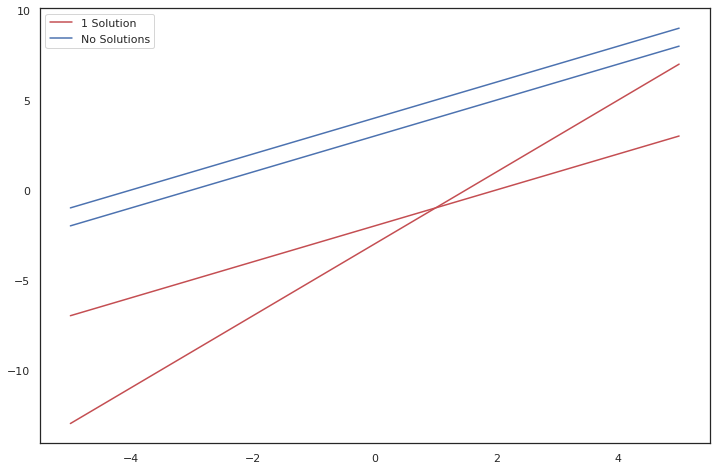

In [5]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(x, x-2, 'r', label='1 Solution')
ax.plot(x, 2*x-3, 'r', label=None)

ax.plot(x, x+3, 'b', label='No Solutions')
ax.plot(x, x+4, 'b', label=None)

ax.legend()
sns.set_style('white')

We can see from the plot above that in some cases there may not be an intersection point. We have omitted the case where there are infinite solutions as it would not be possible to tell the difference between the two lines.

We can further investigate the angle between the two lines defined in the matrix system above which we will denote as $\alpha$. To do this we would first like to convert to a vector form that is easier to work with. Looking at the line equations we defined earlier we can build vectors that are normal to these lines.

$$
\begin{align}
    \mathbf{n}_1 = \langle a_{11},a_{12} \rangle\\
    \mathbf{n}_2 = \langle a_{21},a_{22} \rangle
\end{align}
$$

We note that this follows becuase our normal vectors are just the gradients of the lines. It also follows that the angle is perserved as the normal lines are perpendicular to the original lines by definition. With these vectors in hand we can apply standard vector calculus theorems. In particular we have the following for the dot and cross products:

$$ \mathbf{n}_1\circ\mathbf{n}_2 = a_{11}a_{21}+a_{12}a_{22} = |\mathbf{n}_1||\mathbf{n}_2| cos(\alpha) $$

$$ |\mathbf{n}_1\times\mathbf{n}_2| = a_{11}a_{22}-a_{12}a_{21} = |\mathbf{n}_1||\mathbf{n}_2| sin(\alpha)$$

Using the above values we can clearly see the following relationship:

$$
    \frac{a_{11}a_{22}-a_{12}a_{21}}{a_{11}a_{21}+a_{12}a_{22}} = \frac{|\mathbf{n}_1||\mathbf{n}_2| sin(\alpha)}{|\mathbf{n}_1||\mathbf{n}_2| cos(\alpha)} = tan(\alpha)
$$

Thus we have seen that the solution of the above matrix equation is equivalent to finding the intersection between two lines with angle $\alpha$ defined in the above relationship. Further, we may note that $a_{11}a_{22}-a_{12}a_{21} = det(\mathbf{A})$ and thus an angle of zero corresponds to a singular matrix. This follows because a determinant of zero indicates a singular matrix, and beacause $tan(\alpha)=0\implies sin(\alpha)=0\implies\alpha=0$.

This makes sense as an angle of zero indicates that the lines have no intersection or infinite intersections as they are the same line. In both of these cases one would obtain a singular matrix.

## Problem 2

We seek to determine the optimal relaxation factor when using Gauss-Seidel for a specific matrix equation

Consider the matrix equation:
$
\begin{pmatrix}
    4 &3 &0\\
    3 &4 &-1\\
    0 &-1 &4
\end{pmatrix}
\begin{pmatrix}
    x_1\\
    x_2\\
    x_3
\end{pmatrix}
=
\begin{pmatrix}
    24\\
    30\\
    -24
\end{pmatrix}
$

We would like to determine the optimal relaxation factor $\omega$ where, from Gauss-Seidel, $x_{i+1}=x_i+\omega\frac{r_i}{a_{ii}}$.

To do this we first examine the matrix $\mathbf{A}$ from the above equation. It is clear it is symmetric, and a few steps of Gaussian elimination gives us the following:

$$
\begin{pmatrix}
    4 &3 &0\\
    0 &\frac{7}{4} &-1\\
    0 &0 &\frac{24}{7}
\end{pmatrix}
$$

Thus we can see all of the pivots are positive and we conclude that the matrix is positive definite. This, along with the fact that the matrix is tridiagonal, allows us to appy theorem 7.26 from *Numerical Analyis* to determine the optimal relaxation factor. 

According to this theorem we have the following equation for $\omega_{opt}$, the optimal relaxation factor.

$$ \omega_{opt}=\frac{2}{1+\sqrt{1-\rho^2(\mathbf{T}_j)}} $$

Where $\mathbf{T}_j=\mathbf{D}^{-1}(\mathbf{L}+\mathbf{U})$ given the transformation of the original matrix into its diagonal ($\mathbf{U}$), negative lower diagonal ($\mathbf{L}$), and negative upper diagonal ($\mathbf{U}$). Also note that the operator $\rho$ is the spectral radius operator.

For our problem we have the following:
    
$$
\mathbf{T}_j=
\begin{pmatrix}
    \frac{1}{4} &0 &0\\
    0 &\frac{1}{4} &0\\
    0 &0 &\frac{1}{4}
\end{pmatrix}
\begin{pmatrix}
    0 &-3 &0\\
    -3 &0 &1\\
    0 &1 &0
\end{pmatrix}
=
\begin{pmatrix}
    0 &-\frac{3}{4} &0\\
    -\frac{3}{4} &0 &\frac{1}{4}\\
    0 &\frac{1}{4} &0
\end{pmatrix}
$$

The calculations to find the inverse have been omitted because they are trivial for a diagonal matrix.

Looking for eigenvalues we want the determinant of $\mathbf{T}_j-\lambda\mathbf{I}$.

$$
\begin{vmatrix}
    -\lambda &-\frac{3}{4} &0\\
    -\frac{3}{4} &-\lambda &\frac{1}{4}\\
    0 &\frac{1}{4} &-\lambda
\end{vmatrix}
=
-\lambda(\lambda^2-\frac{5}{8})
$$

So we have $\rho(\mathbf{T}_j)=\sqrt{\frac{5}{8}}$, and plugging this into our fomula we have

$$ \boxed{\omega_{opt}=\frac{2}{1+\sqrt{\frac{3}{8}}}\approx1.24041} $$

## Problem 3

We examine the iterative method for calculating a matrix inverse.

We consider the matrix: 
$
\mathbf{A}=
\begin{pmatrix}
    3 &0 &1\\
    0 &5 &0\\
    -1 &1 &-1
\end{pmatrix}
$

In [6]:
A = np.array([[3, 0, 1], [0, 5, 0], [-1, 1, -1]])

### a).

We first determine the exact value for $\mathbf{A}^{-1}$ using the cofactor method.

We begin by building our matrix of cofactors which is the matrix of minors with alternating positive and negative coefficients.

$$
\begin{pmatrix}
    -5 &0 &5\\
    1 &-2 &-3\\
    -5 &0 &15
\end{pmatrix}
$$

Next we need to determine the $det(\mathbf{A})$ which is given below:

$$
\begin{vmatrix}
    3 &0 &1\\
    0 &5 &0\\
    -1 &1 &-1
\end{vmatrix}
=-10
$$

Finally we multiply the transpose of our cofactor matrix by the inverse of the determinant. This gives the inverse of the original matrix as

$$
\mathbf{A}^{-1}=
\begin{pmatrix}
    \frac{1}{2} &\frac{-1}{10} &\frac{1}{2}\\
    0 &\frac{1}{5} &0\\
    \frac{-1}{2} &\frac{3}{10} &\frac{-3}{2}
\end{pmatrix}
$$

In [7]:
A_inv = np.array([[1/2,-1/10,1/2], [0,1/5,0], [-1/2,3/10,-3/2]])
print(A@A_inv)

[[ 1.00000000e+00 -5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.55111512e-17  1.00000000e+00]]


So we can see that indeed we have found the inverse. Note the two slightly non-zero terms are just due to numerical error.

### b).

We start with the approximation: 
$
\mathbf{X}_0=
\begin{pmatrix}
    0.5 &-0.1 &0.4\\
    0 &0.2 &0\\
    -0.4 &0.3 &-1.5
\end{pmatrix}
$

Then we use the iterative method in the form $\mathbf{X}_{i+1}=\mathbf{X}_i(2\mathbf{I}-\mathbf{AX}_i)$ to calculate our next approximation.

In [8]:
X_0 = np.array([[0.5,-0.1,0.4],[0,0.2,0],[-0.4,0.3,-1.5]])
X_1 = X_0@(2*np.eye(3)-A@X_0)
print(X_1)

[[ 0.49 -0.1   0.51]
 [ 0.    0.2   0.  ]
 [-0.51  0.3  -1.47]]


We can see the next approximation $\mathbf{X}_1$ printed above. It looks quite close to the true inverse.

### c).

With these two approximations in hand we can then calculate the deviation from the true inverse. We will do this by using the matrix infinity norm.

In [9]:
e0 = np.linalg.norm(A_inv-X_0, ord=np.inf)
e1 = np.linalg.norm(A_inv-X_1, ord=np.inf)

print('First approximation deviation: %f' % (e0))
print('Second approximation deviation: %f' % (e1))

First approximation deviation: 0.100000
Second approximation deviation: 0.040000


We can see that one iteration has reduced the error by more than half to something of magnitude $10^{-2}$.

## Problem 4

We use the power method to find the dominant eigenvalue and corresponding eigenvector.

We consider the matrix: 
$
\mathbf{A}=
\begin{pmatrix}
    2 &-1 &0 &0\\
    -1 &2 &-1 &0\\
    0 &-1 &2 &-1\\
    0 &0 &-1 &2
\end{pmatrix}
$

In [10]:
A = np.array([[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]])
eig = np.linalg.eig(A)
# print(eig)

eval_max = np.amax(eig[0])
i = np.argmax(eig[0])
evec_max = eig[1][:, i]

print('Expected max eigenvalue: %f' % eval_max)
print('Expected eigenvector:')
print(evec_max)

Expected max eigenvalue: 3.618034
Expected eigenvector:
[-0.37174803  0.60150096 -0.60150096  0.37174803]


### a).

We start with an initial guess $\mathbf{x}_0=(1,1,1,1)^T$

In [41]:
x_0 = np.ones(4)

e_val, e_vec = eigenPower(A, x_0, iterations=100)

print('Maximum eigenvalue: %f' % e_val)
print('Associated Eigenvector:')
print(e_vec)

Maximum eigenvalue: 2.618034
Associated Eigenvector:
[ 0.60151614 -0.37172346 -0.37172346  0.60151614]


### b).

We start with an initial guess $\mathbf{x}_0=(1,1,5,1)^T$

In [11]:
x_0 = np.array([1,1,5,1])

e_val, e_vec = eigenPower(A, x_0, iterations=100)

print('Maximum eigenvalue: %f' % e_val)
print('Associated Eigenvector:')
print(e_vec)

Maximum eigenvalue: 3.618023
Associated Eigenvector:
[ 0.37029558 -0.6006023   0.6023962  -0.37319818]


### c).

From parts a and b above we see two completely different answers. The cause of the difference is the initial guess. We note that the answer obtained in part b is the correct answer where the eigenvector has just been scaled by -1. This elicits an interesting case of the power method where it should give the dominant eigenvector but doesn't always do so.

## Problem 5

We use the power method and the Rayleigh quotient to examine the eigenstuff of a matrix.

We consider the matrix: 
$
\mathbf{A}=
\begin{pmatrix}
    2 &-1 &1\\
    -1 &3 &2\\
    1 &2 &3
\end{pmatrix}
$

We take our initial guess to be $\mathbf{x}_0=(1,1,1)^T$

In [12]:
A = np.array([[2,-1,1],[-1,3,2],[1,2,3]])
x_0 = np.ones(3)

eig = np.linalg.eig(A)
# print(eig)

eval_max = np.amax(eig[0])
i = np.argmax(eig[0])
evec_max = eig[1][:, i]

print('Expected max eigenvalue: %f' % eval_max)
print('Expected eigenvector:')
print(evec_max)

Expected max eigenvalue: 5.000000
Expected eigenvector:
[1.96528324e-16 7.07106781e-01 7.07106781e-01]


### a).

We use three iterations of the power method to determine the Rayleigh quotient and associated error estimate. We employ...

In [13]:
q, error = rayleigh(A, x_0, iterations=3)

print('Rayleigh Quotient: %f, Error < %f' % (q, error))

Rayleigh Quotient: 4.917178, Error < 0.398478


We can see that our Rayleigh quotient has quite accurately approximated our eigenvalue of 5. The erroe is indeed less than the given amount and is only of magnitude $10^{-1}$.

### b).

We use the power method to identify the maximum eigenvalue and eigenvector.

In [14]:
e_val, e_vec = eigenPower(A, x_0)

print('Maximum eigenvalue: %f' % e_val)
print('Associated Eigenvector:')
print(e_vec)

Maximum eigenvalue: 4.999991
Associated Eigenvector:
[0.00102614 0.70659315 0.70761929]


The power method has very accurately approximated both the dominant eigenvalue and its associated eigenvector. 